In [271]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [272]:
def cumulative_reward(x):
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

In [273]:
df = pd.read_json('research.json')

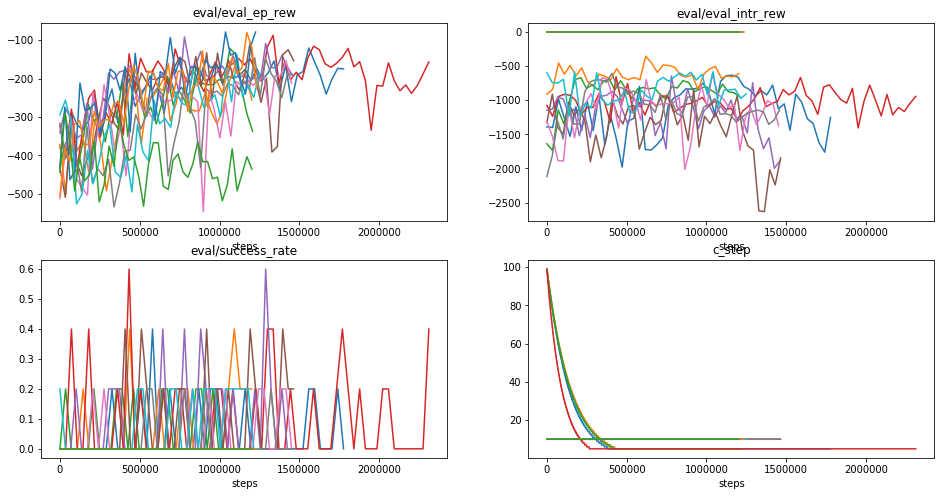

In [274]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(8)
for ax_idx, ax in enumerate(axes.flatten()):
    #ax.set(xlabel='steps', ylabel='reward')
    for i in range(13):
        data = df[keys[ax_idx]][i]
        steps = df['_step'][i]
        ax.plot(np.linspace(0, steps[-1], len(data)), data)
        ax.set(title=keys[ax_idx], xlabel='steps')
        #ax.set(xlim=[0, 45])     
  

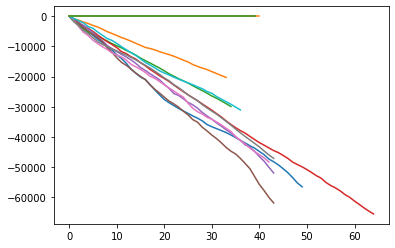

In [275]:
cumul_ep_rew = [cumulative_reward(x) if len(x) > 0 else 0 for x in df[keys[1]]]
for x in cumul_ep_rew:
    plt.plot(x)
    #plt.xlim([0,40])